# **Classification Model for Online Retail Customer Churn**

---------------


# 1. Perkenalan

## 1.1 Identity

NAMA : PUTRA RIZQA YASIRA

BATCH : SBY-004

##  1.2 Big Picture of Dataset

The existing dataset is online retail customer churn data, in this dataset stores information about customers, customer transactions, customer satisfaction with retail, promotions, and whether customers churn or not.

Dataset can be seen [here](https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset)

## 1.3 Goals/Objective

>Create a Classification Model to be able to predict whether a customer churns or not, the model will use features that are likely to affect the decision of the customer to churn or not. The model building process tries 5 algorithms, namely K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, and Ada Boost. The five algorithms will also be tuned to get the best model and will be used for classification. For model evaluation, we will use recall metric to evaluate how well the model classifies customers who will churn and minimize customers who are actually churning but not detected churn.

# 2. Import Library

In [1]:
import pandas as pd
# all columns display
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split data
from sklearn.model_selection import train_test_split

# handle outlier with capping
from feature_engine.outliers import Winsorizer

# scaling and encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

# model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#cross val
from sklearn.model_selection import cross_val_score

# model evaluation using mae and r2 score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, recall_score

#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#save model
import pickle
import json

#ignore warnings message
import warnings
warnings.filterwarnings("ignore")

# 3. Data Loading

retrieve dataset from csv file

In [2]:
df = pd.read_csv('online_retail_customer_churn.csv')

display data

In [3]:
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


| Nama Kolom | Penjelasan |
| :----:     | :---:      |
|Customer_ID|A unique identifier for each customer.|
|Age|The customer's age.|
|Gender|The customer's gender (Male, Female, Other).|
|Annual_Income|The annual income of the customer in thousands of dollars.|
|Total_Spend|The total amount spent by the customer in the last year.|
|Years_as_Customer|The number of years the individual has been a customer of the store.|
|Num_of_Purchases| The number of purchases the customer made in the last year.|
|Average_Transaction_Amount|The average amount spent per transaction.|
|Num_of_Returns| The number of items the customer returned in the last year.|
|Num_of_Support_Contacts|The number of times the customer contacted support in the last year.|
|Satisfaction_Score| A score from 1 to 5 indicating the customer's satisfaction with the store.|
|Last_Purchase_Days_Ago|The number of days since the customer's last purchase.|
|Email_Opt_In|Whether the customer has opted in to receive marketing emails.|
|Promotion_Response|The customer's response to the last promotional campaign (Responded, Ignored, Unsubscribed).|
|Target_Churn|Indicates whether the customer churned (True or False).|




checking the general information in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

The dataset has 15 columns, where 2 columns are boolean type, 3 columns are float type, 8 columns are integer type, and 2 columns are object type.

In the data there are also no null or empty values found in all columns.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.50000,288.819436,1.00,250.7500,500.500,750.2500,1000.00
Age,1000.0,43.26700,15.242311,18.00,30.0000,43.000,56.0000,69.00
Annual_Income,1000.0,111.96296,52.844111,20.01,67.8000,114.140,158.4525,199.73
Total_Spend,1000.0,5080.79265,2862.123350,108.94,2678.6750,4986.195,7606.4700,9999.64
Years_as_Customer,1000.0,9.72700,5.536346,1.00,5.0000,9.000,14.0000,19.00
Num_of_Purchases,1000.0,49.45600,28.543595,1.00,25.0000,49.000,74.0000,99.00
Average_Transaction_Amount,1000.0,266.87653,145.873445,10.46,139.6825,270.100,401.6025,499.57
Num_of_Returns,1000.0,4.61200,2.896869,0.00,2.0000,5.000,7.0000,9.00
Num_of_Support_Contacts,1000.0,1.93400,1.402716,0.00,1.0000,2.000,3.0000,4.00
Satisfaction_Score,1000.0,2.97400,1.391855,1.00,2.0000,3.000,4.0000,5.00


generalized checking is also performed on numerical data

In [6]:
df.describe(include="object").T

,count,unique,top,freq
Gender,1000,3,Female,342
Promotion_Response,1000,3,Unsubscribed,361


object data is also checked in general

# 4. Exploratory Data Analysis (EDA)

checked for the total percent of duplicate data

In [7]:
print(f"{((df.duplicated().sum())/(len(df)))*100:.2f}%")

0.00%


after checking there is no duplicate data

for missing values data is also checked

In [8]:
print(f"{((df.isna().sum().sum())/(len(df)))*100:.2f}%")

0.00%


There are also no missing values in this dataset.

## 4.1 EDA Target (Target_Churn)

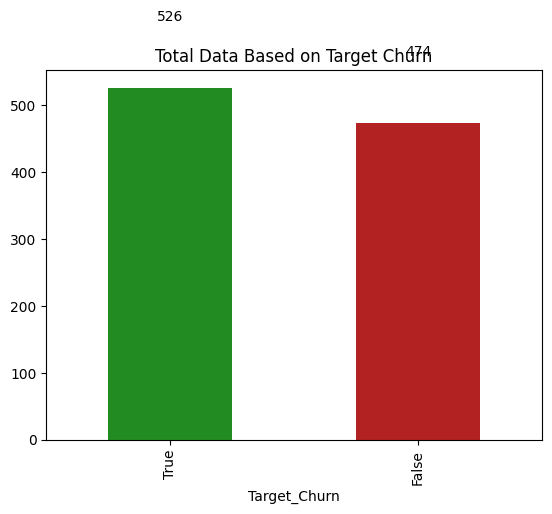

In [9]:
counts = df['Target_Churn'].value_counts()

# Plotting the bar plot
ax = counts.plot(kind='bar', color=['forestgreen','firebrick'])

# Adding labels to each bar
for i, count in enumerate(counts):
    ax.text(i, count + 100, str(count), ha='center')
plt.title('Total Data Based on Target Churn')
# Displaying the plot
plt.show()


from the overall data, churn found that 526 customers chose churn and 474 customers did not churn, from the visualization above, it is found that the data is quite balanced.

Text(0.5, 1.0, 'Total Data Based on Customer Spend and Income')

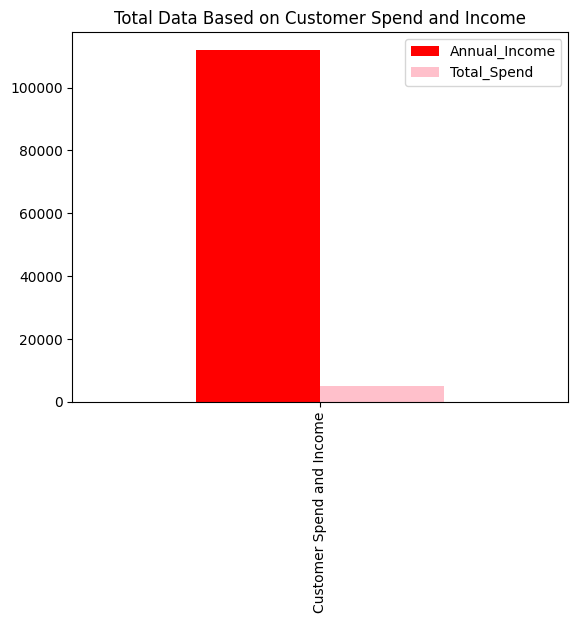

In [10]:
totalofcluster = pd.DataFrame({'Annual_Income': [(df['Annual_Income'].mean()*1000)],
                         'Total_Spend': [(df['Total_Spend'].mean())],
                          },
                        index=['Customer Spend and Income'])
 
 
# create stacked bar chart for students DataFrame
totalofcluster.plot(kind='bar', stacked=False, color=['red', 'pink'])
 
# Add Title and Labels
plt.title('Total Data Based on Customer Spend and Income')

the average total spend from each customer is very little compared to the annual income.

## 4.2 EDA Others

Text(0.5, 1.0, 'Histogram of Age')

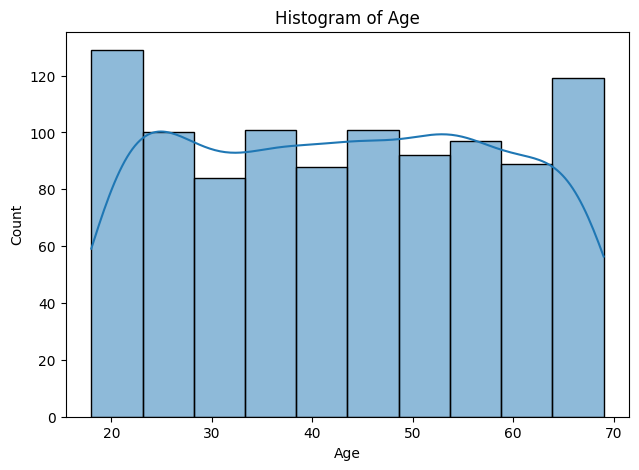

In [11]:
#create histogram and scatter plot
plt.figure(figsize=(16,5))      #canvas size is 16,5 inch
plt.subplot(1,2,1)              #first plot in 1,2,1
sns.histplot(df['Age'],       #plot would be HISTOGRAM of Age
             kde=True,          #add line along with it
             bins=10)           #range value would be div by 10 or there would be 10 bars
plt.title("Histogram of Age") #title

data distribution based on age is quite normal

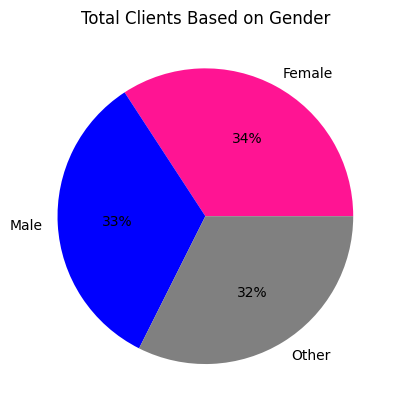

In [12]:
plt.title("Total Clients Based on Gender")
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index.to_list(), autopct='%1.0f%%', colors=['deeppink','blue','grey']);

In the data, there are 3 categories of gender where the largest is female at 34% of the total data, followed by male 33%, and 32% for other. Other here reflects customers who choose not to provide their gender information.

In [13]:
ranges = df['Annual_Income'].max() - df['Annual_Income'].min()
print('Range Annual Income :',ranges)
print('from',df['Annual_Income'].min(), 'to', df['Annual_Income'].max())

Range Annual Income : 179.72
from 20.01 to 199.73


Annual income range of customers is at $179k

Lowest at $20k and highest at $199k

$20k to $200k

Text(0.5, 1.0, 'Histogram of Total Spend')

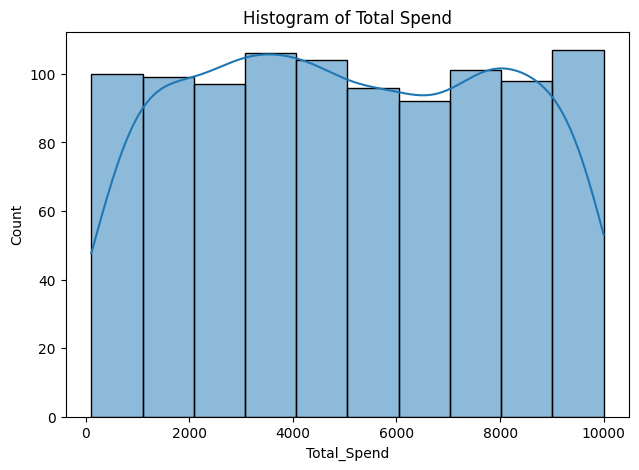

In [14]:
#create histogram and scatter plot
plt.figure(figsize=(16,5))      #canvas size is 16,5 inch
plt.subplot(1,2,1)              #first plot in 1,2,1
sns.histplot(df['Total_Spend'],       #plot would be HISTOGRAM of Total_Spend
             kde=True,          #add line along with it
             bins=10)           #range value would be div by 10 or there would be 10 bars
plt.title("Histogram of Total Spend") #title

The distribution of data based on total spend also looks quite normal.

In [15]:
ranges = df['Years_as_Customer'].max() - df['Years_as_Customer'].min()
print('Range Years as Customer :',ranges)
print('from',df['Years_as_Customer'].min(), 'to', df['Years_as_Customer'].max())

Range Years as Customer : 18
from 1 to 19


The range of customer loyalty is at 18 years

The lowest at 1 year and the highest level of loyalty is at 19 years

Text(0.5, 1.0, 'Histogram of Average Transaction Amount')

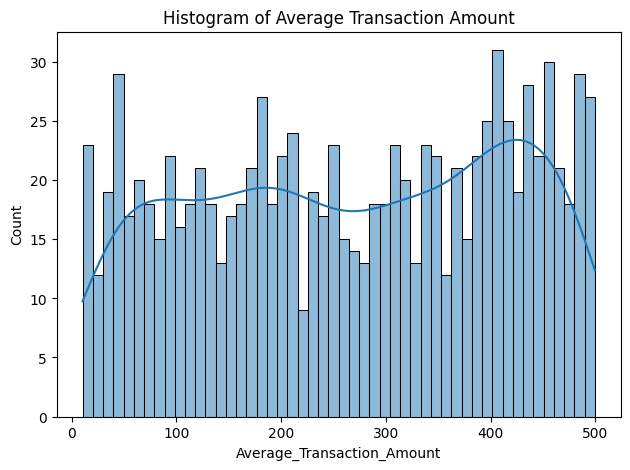

In [16]:
#create histogram and scatter plot
plt.figure(figsize=(16,5))      #canvas size is 16,5 inch
plt.subplot(1,2,1)              #first plot in 1,2,1
sns.histplot(df['Average_Transaction_Amount'],       #plot would be HISTOGRAM of Average_Transaction_Amount
             kde=True,          #add line along with it
             bins=50)           #range value would be div by 50 or there would be 50 bars
plt.title("Histogram of Average Transaction Amount") #title

The distribution of average total customer transactions is very diverse but still normal.

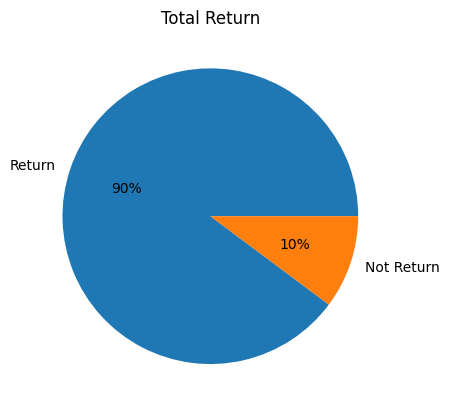

In [17]:
returnpie = len(df[df['Num_of_Returns']!=0])
notreturnpie = len(df[df['Num_of_Returns']==0])
returnotreturnpie = [returnpie,notreturnpie]
plt.title("Total Return")
plt.pie(returnotreturnpie, labels=['Return','Not Return'], autopct='%1.0f%%');

90% of customers have made a return

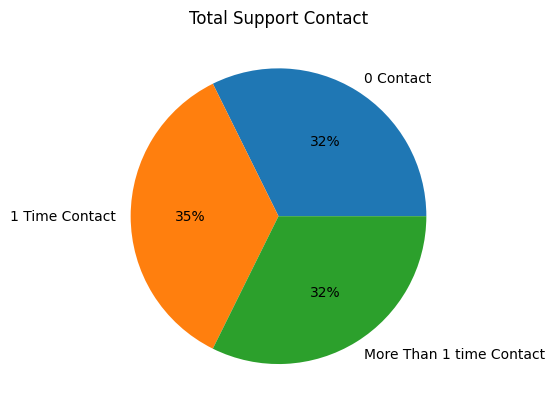

In [18]:
nocontactpie = len(df[df['Num_of_Support_Contacts']==0])
contact1pie = len(df[df['Num_of_Support_Contacts']==1])
contactmorethan1pie = len(df[df['Num_of_Support_Contacts']<1])
contactnocontactpie = [nocontactpie,contact1pie,contactmorethan1pie]
plt.title("Total Support Contact")
plt.pie(contactnocontactpie, labels=['0 Contact','1 Time Contact','More Than 1 time Contact'], autopct='%1.0f%%');

32% of customers have never had problems with their purchases, 35% of customers have contacted the customer once and then the problem can be resolved immediately, and 32% of customers have problems that cannot be resolved by contacting Support Contact once.

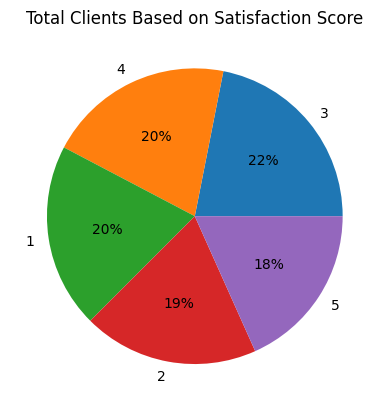

In [19]:
plt.title("Total Clients Based on Satisfaction Score")
plt.pie(df['Satisfaction_Score'].value_counts(), labels=df['Satisfaction_Score'].value_counts().index.to_list(), autopct='%1.0f%%');

only 18% of customers rated retail as very good and 20% of customers rated retail as very bad.

Text(0.5, 1.0, 'Histogram of Last Purchase Days Ago')

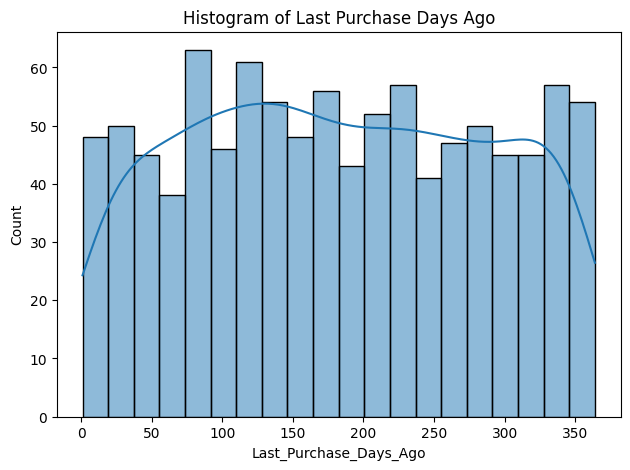

In [20]:
#create histogram and scatter plot
plt.figure(figsize=(16,5))      #canvas size is 16,5 inch
plt.subplot(1,2,1)              #first plot in 1,2,1
sns.histplot(df['Last_Purchase_Days_Ago'],       #plot would be HISTOGRAM of Last_Purchase_Days_Ago
             kde=True,          #add line along with it
             bins=20)           #range value would be div by 20 or there would be 20 bars
plt.title("Histogram of Last Purchase Days Ago") #title

data distribution related to the last day of normal customer spending

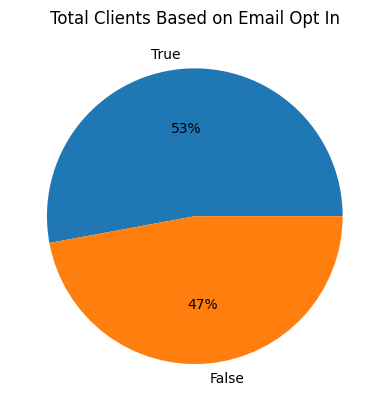

In [21]:
plt.title("Total Clients Based on Email Opt In")
plt.pie(df['Email_Opt_In'].value_counts(), labels=df['Email_Opt_In'].value_counts().index.to_list(), autopct='%1.0f%%');

53% of customers have provided their email

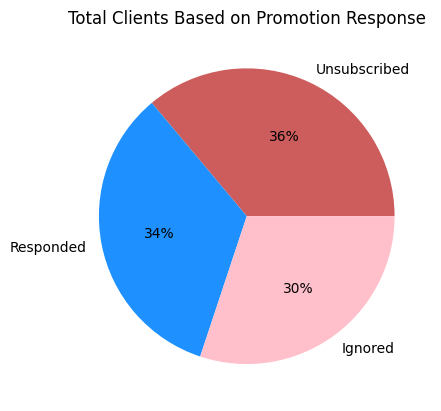

In [22]:
plt.title("Total Clients Based on Promotion Response")
plt.pie(df['Promotion_Response'].value_counts(), labels=df['Promotion_Response'].value_counts().index.to_list(), autopct='%1.0f%%', colors=['indianred','dodgerblue','pink']);

Promotion response into 3 ordinal categories:
- Responded is a customer who responds to promotions, this type of customer is a customer who accepts promotions well. 
- Ignored is a customer who does not care about the promotion given, this type of customer is a customer who ignores the promotion but also does not unsubscribe.
- Unsubscribed is a customer who chooses to unsubscribe due to the promotion given, this type of customer is a customer who instead of accepting the promotion, this customer chooses to unsubscribe.

Based on promotion response, 36% unsubscribed, 34% responded favorably, and 30% ignored the promotion.

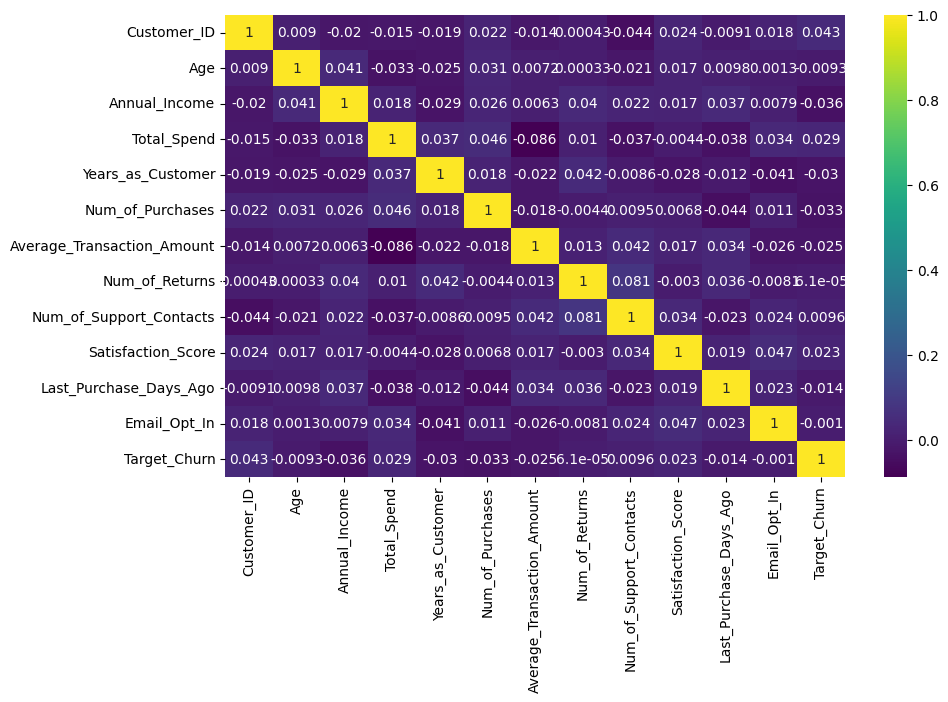

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='viridis', cbar=True)
plt.show()

The correlation of each column is also checked for correlation, it is found that the correlation between the target, Target_Churn, and other columns is negatively and positively correlated.

According to [Kemenkes](https://ayosehat.kemkes.go.id/kategori-usia/remaja), the age range is divided into 5, namely: 
- Infants and toddlers under 5 years old
- Children aged 5-9 years
- Adolescents aged 10-18 years
- Adults aged 19-59 years
- Elderly 60 years and above

In [24]:
df['Age'].unique()

array([62, 65, 18, 21, 57, 27, 37, 39, 68, 54, 41, 24, 42, 30, 19, 56, 64,
       35, 55, 43, 31, 26, 38, 69, 34, 23, 33, 36, 53, 67, 47, 32, 50, 49,
       28, 29, 46, 52, 58, 22, 59, 60, 45, 66, 48, 61, 20, 40, 44, 63, 51,
       25], dtype=int64)

seen in the maximum and minimum values in the age range in this data 18-69 years, so a new column will be created for the age range.

In [25]:
print('ranges age max : ',df['Age'].max())
print('ranges age min : ',df['Age'].min())

ranges age max :  69
ranges age min :  18


In [26]:
def age_group(age):
    if age <= 18:
        return  "teenager"
    elif age <= 59:
        return "adult"
    else:
        return "elderly"
    
df['age_group'] = df['Age'].apply(age_group)

In [27]:
df['age_group'].value_counts()

age_group
adult       788
elderly     188
teenager     24
Name: count, dtype: int64

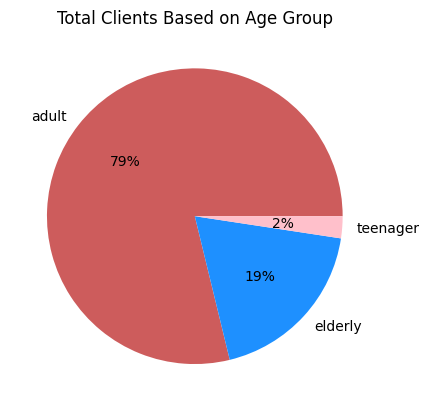

In [28]:
plt.title("Total Clients Based on Age Group")
plt.pie(df['age_group'].value_counts(), labels=df['age_group'].value_counts().index.to_list(), autopct='%1.0f%%', colors=['indianred','dodgerblue','pink']);

79% of customers in the adult age range, 19% elderly, 2% still teenagers

# 5. Feature Engineering

because the target to be classified is churn or not so the target selected is the Target_Churn column.

in features, Customer id will be dropped because it is not used for model processing, age will also be dropped and will be replaced by age_drop for smaller cardinality.

In [29]:
#split between Feature (X) and Target (y)
X = df.drop(["Target_Churn","Customer_ID","Age"], axis=1) #drop target column and other from features
y = df['Target_Churn']                #the target column is "Target_Churn"

display(X)
display(y)

,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,age_group
0,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,elderly
1,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,elderly
2,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,teenager
3,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,adult
4,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,adult
996,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,adult
997,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,adult
998,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,adult


0       True
1      False
2       True
3       True
4      False
       ...  
995    False
996     True
997    False
998     True
999     True
Name: Target_Churn, Length: 1000, dtype: bool

## 5.2 Dividing Data Into Train-set & Test-set

then the data is divided into train and test data with the size of the test data 30 percent of the overall data

In [30]:
#split train & test for feature (X) & Target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y,               #split from feature & target
                                                    test_size=0.3,      #proportional of test 
                                                    random_state=15)    #random state 15

#show shape of feature (X in train & tes)
print("Train size : ", X_train.shape)
print("Test size : ", X_test.shape)

#show train of feature (X_train)
X_train

Train size :  (700, 13)
Test size :  (300, 13)


,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,age_group
366,Male,55.55,780.90,6,14,109.62,0,0,2,150,False,Ignored,adult
302,Female,199.73,4065.05,4,11,334.83,2,1,5,130,True,Responded,adult
305,Female,167.78,5239.08,18,42,457.81,1,3,3,107,True,Ignored,adult
684,Female,189.46,3575.24,4,21,446.44,6,1,1,170,False,Unsubscribed,elderly
348,Male,69.27,6641.91,19,32,65.88,2,2,2,102,True,Unsubscribed,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Other,197.74,1823.42,1,22,455.76,6,0,2,286,False,Responded,elderly
645,Other,41.16,9898.68,5,75,385.69,7,3,3,63,False,Unsubscribed,elderly
908,Female,137.04,7226.54,4,40,208.50,5,3,2,206,False,Ignored,elderly
757,Other,150.05,2835.06,13,72,120.57,9,1,4,244,True,Responded,elderly


## 5.3 Feature (x) Selection

In [31]:
X_train.columns

Index(['Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
       'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
       'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'age_group'],
      dtype='object')

features used are:

- Gender (categorical)

- Annual_Income (numerical)

- Total_Spend (numerical)

- Years_as_Customer (numerical)

- Num_of_Purchases (numerical)

- Average_Transaction_Amount (numerical)

- Num_of_Returns (numerical)

- Num_of_Support_Contacts (numerical)

- Satisfaction_Score (categorical ordinal)

- Last_Purchase_Days_Ago (numerical)

- Email_Opt_In (categorical)

- Promotion_Response (categorical)

- Age Group (categorical)



## 5.4 Data Handling

### 5.4.1 Handle Outlier

Checking for data outliers, starting with checking the skewness for numerical data.

In [32]:
#select numeric columns
num_cols = ["Annual_Income","Total_Spend","Years_as_Customer","Num_of_Purchases",
            "Average_Transaction_Amount","Num_of_Returns","Num_of_Support_Contacts","Last_Purchase_Days_Ago"]
#empty list
list_item = []
#looping to check skew
for col in num_cols:
    list_item.append([col, X_train[col].skew()])
#create into df
pd.DataFrame(columns=['Columns Name','Skewness'], data=list_item)

,Columns Name,Skewness
0,Annual_Income,-0.084953
1,Total_Spend,0.020882
2,Years_as_Customer,0.105464
3,Num_of_Purchases,0.050922
4,Average_Transaction_Amount,-0.104586
5,Num_of_Returns,-0.040448
6,Num_of_Support_Contacts,0.093641
7,Last_Purchase_Days_Ago,-0.010524


The calculation of skewness is if it is in the range of -0.5 to +0.5 the distribution of data is normal, so outside of that it is considered skew.

In [33]:
def upllowboundnormal(df,var):
    avg = df[var].mean()
    std = df[var].std()

    up_bound = avg + 3*std
    low_bound = avg - 3*std

    print(f'Upper Boundary: {up_bound:.2f}' )
    print(f'Lower Boundary: {low_bound:.2f}')
    outlier = df[var][(df[var]<low_bound) | (df[var]>up_bound)]
    print(f'Percentage of outliers: {len(outlier)*100/len(df[var]):.2f}%')

In [34]:
upllowboundnormal(X_train,'Annual_Income')

Upper Boundary: 274.12
Lower Boundary: -47.42
Percentage of outliers: 0.00%


In [35]:
upllowboundnormal(X_train,'Total_Spend')

Upper Boundary: 13687.15
Lower Boundary: -3523.14
Percentage of outliers: 0.00%


In [36]:
upllowboundnormal(X_train,'Years_as_Customer')

Upper Boundary: 26.39
Lower Boundary: -6.92
Percentage of outliers: 0.00%


In [37]:
upllowboundnormal(X_train,'Num_of_Purchases')

Upper Boundary: 135.67
Lower Boundary: -35.94
Percentage of outliers: 0.00%


In [38]:
upllowboundnormal(X_train,'Average_Transaction_Amount')

Upper Boundary: 702.16
Lower Boundary: -164.76
Percentage of outliers: 0.00%


In [39]:
upllowboundnormal(X_train,'Num_of_Returns')

Upper Boundary: 13.38
Lower Boundary: -4.24
Percentage of outliers: 0.00%


In [40]:
upllowboundnormal(X_train,'Num_of_Support_Contacts')

Upper Boundary: 6.11
Lower Boundary: -2.26
Percentage of outliers: 0.00%


In [41]:
upllowboundnormal(X_train,'Last_Purchase_Days_Ago')

Upper Boundary: 490.70
Lower Boundary: -116.94
Percentage of outliers: 0.00%


from checking each column, there were 0% outliers in each feature so no outlier handling was done.

In [42]:
#empty list
list_item = []
#looping to check skew
for col in num_cols:
    list_item.append([col, X_train[col].skew()])
#create into df
pd.DataFrame(columns=['Columns Name','Skewness'], data=list_item)

,Columns Name,Skewness
0,Annual_Income,-0.084953
1,Total_Spend,0.020882
2,Years_as_Customer,0.105464
3,Num_of_Purchases,0.050922
4,Average_Transaction_Amount,-0.104586
5,Num_of_Returns,-0.040448
6,Num_of_Support_Contacts,0.093641
7,Last_Purchase_Days_Ago,-0.010524


check that the skewness remains normal

### 5.4.2 Handle Data Duplicate

In [43]:
print(f"{((df.duplicated().sum())/(len(df)))*100:.2f}%")

0.00%


no duplicate data

### 5.4.3 Handle Missing Value

In [44]:
X_train.isna().sum().sum()

0

In [45]:
X_test.isna().sum().sum()


0

In [46]:
y_train.isna().sum().sum()


0

In [47]:
y_test.isna().sum().sum()

0

after checking the train data and test data there are no missing values

## 5.5 Splitting Numerical-Categorical 

The data will be split into 3, namely:
- numerical data
- categorical data
- ordinal categorical data


numerical data has been split when checking skew for handling outliers so below will be split for categorical data only.

In [48]:
#get numeric and category columns
cat_col = ['Gender','Email_Opt_In','age_group','Promotion_Response'] 
cat_col_ord = ['Satisfaction_Score']

#show what included in each list
print("Numeric columns skew: ",num_cols)
print("Categorical Nominal columns : ",cat_col)
print("Categorical Nominal Ordinal columns : ",cat_col_ord)

Numeric columns skew:  ['Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts', 'Last_Purchase_Days_Ago']
Categorical Nominal columns :  ['Gender', 'Email_Opt_In', 'age_group', 'Promotion_Response']
Categorical Nominal Ordinal columns :  ['Satisfaction_Score']


## 5.6 Feature (X) Transformation

### 5.6.1 Scalling

numerical data is scaled to the data

In [49]:
numeric_transformer_1 = Pipeline([
    ('scaler_n', StandardScaler())
])

### 5.6.2 One Hot Encoding

categorical data is done one hot encoding of the data

In [50]:
categorical_transformer_1 = Pipeline([
    ('encoder_n', OneHotEncoder(handle_unknown='ignore'))
])

### 5.6.3 Ordinal Encoding

ordinal categorical data is performed ordinal encoding to the data

['Satisfaction_Score']

according to ordinal categories: 
- satisfaction score ranked from 0-5 

In [51]:
categorical_transformer_2 = Pipeline([
    ('encoder_n', OrdinalEncoder(categories=[['0','1','2','3','4','5']]))
])

## 5.7 Making/Defining Pipeline

after scaling and encoding, then the results are merged in a pipeline called preprocessor

In [52]:
# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_n', numeric_transformer_1, num_cols),
    ('cat_n', categorical_transformer_1, cat_col),
    ('cat_ord_n', categorical_transformer_2, cat_col_ord)
])

# 6. Model Definition

in this project, 5 base models are used, the base model is a model that purely uses default parameters, the model will also be included in the pipeline along with the previous preprocessor.

## 6.1 K-Nearest Neighbors

In [53]:
# Define the pipeline with preprocessing and classification steps
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

## 6.2 Support Vector Machine

In [54]:
# Define the pipeline with preprocessing and classification steps
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

## 6.3 Decision Tree

In [55]:
# Define the pipeline with preprocessing and classification steps
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

## 6.4 Random Forest

In [56]:
# Define the pipeline with preprocessing and classification steps
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

## 6.5 Ada Boost (Boosting)

In [57]:
# Define the pipeline with preprocessing and classification steps
pipeline_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())
])

# 7. Model Training (Base Model)

The model is then trained so that the model can learn the data using the algorithms used.

## 7.1 K-Nearest Neighbors

In [58]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['Annual_Income',
                                                   'Total_Spend',
                                                   'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Average_Transaction_Amount',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Last_Purchase_Days_Ago']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Email_Opt_In',
                                                   'age_group',
                                                   'Promotion_Response']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['Satisfaction_Score'])])),
                ('classifier', KNeighborsClassifier())])

## 7.2 Support Vector Machine

In [59]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['Annual_Income',
                                                   'Total_Spend',
                                                   'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Average_Transaction_Amount',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Last_Purchase_Days_Ago']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Email_Opt_In',
                                                   'age_group',
                                                   'Promotion_Response']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['Satisfaction_Score'])])),
                ('classifier', SVC())])

## 7.3 Decision Tree

In [60]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['Annual_Income',
                                                   'Total_Spend',
                                                   'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Average_Transaction_Amount',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Last_Purchase_Days_Ago']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Email_Opt_In',
                                                   'age_group',
                                                   'Promotion_Response']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['Satisfaction_Score'])])),
                ('classifier', DecisionTreeClassifier())])

## 7.4 Random Forest

In [61]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['Annual_Income',
                                                   'Total_Spend',
                                                   'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Average_Transaction_Amount',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Last_Purchase_Days_Ago']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Email_Opt_In',
                                                   'age_group',
                                                   'Promotion_Response']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['Satisfaction_Score'])])),
                ('classifier', RandomForestClassifier())])

## 7.5 Ada Boost (Boosting)

In [62]:
pipeline_ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['Annual_Income',
                                                   'Total_Spend',
                                                   'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Average_Transaction_Amount',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Last_Purchase_Days_Ago']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Email_Opt_In',
                                                   'age_group',
                                                   'Promotion_Response']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['Satisfaction_Score'])])),
                ('classifier', AdaBoostClassifier())])

# 8. Model Evaluation (Base Model)

After successfully training, the model that has been made is then evaluated to determine which model is better and evaluate each model.

The metric that will be focused on is recall to evaluate how well the model classifies customers who will churn and minimize customers who are actually churning but not detected churn.
Evaluate the model using cross validation to find out how well the model classifies with more general data.

## 8.1 K-Nearest Neighbors

data prediction using KNN model

In [63]:
y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

In [64]:
print('Recall Score:',recall_score(y_train, y_pred_train_knn))
print('\n',classification_report(y_train, y_pred_train_knn))

Recall Score: 0.7424657534246575

               precision    recall  f1-score   support

       False       0.69      0.62      0.65       335
        True       0.68      0.74      0.71       365

    accuracy                           0.68       700
   macro avg       0.68      0.68      0.68       700
weighted avg       0.68      0.68      0.68       700



In [65]:
print('Recall Score:',recall_score(y_test, y_pred_test_knn))
print('\n',classification_report(y_test, y_pred_test_knn))

Recall Score: 0.6024844720496895

               precision    recall  f1-score   support

       False       0.42      0.34      0.38       139
        True       0.51      0.60      0.55       161

    accuracy                           0.48       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.48      0.47       300



In [66]:
recall_train_cross_val_knn = cross_val_score(pipeline_knn,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_knn)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_knn.mean()-recall_train_cross_val_knn.std()) , '-', (recall_train_cross_val_knn.mean()+recall_train_cross_val_knn.std()))

recall - All - Cross Validation  :  [0.58196721 0.54545455 0.54098361]
recall - Mean - Cross Validation :  0.5561351217088921
recall - Std - Cross Validation  :  0.01835701561540175
recall - Range of Test-Set       :  0.5377781060934904 - 0.5744921373242938


train data recall value: 0.7424657534246575

test data recall value: 0.6024844720496895

cross validation value: 0.5561351217088921

Noted: The closer the recall and cross validation values are to 1, the better.

## 8.2 Support Vector Machine

data prediction using SVM model

In [67]:
y_pred_train_svm = pipeline_svm.predict(X_train)
y_pred_test_svm = pipeline_svm.predict(X_test)

In [68]:
print('Recall Score:',recall_score(y_train, y_pred_train_svm))
print('\n',classification_report(y_train, y_pred_train_svm))

Recall Score: 0.8493150684931506

               precision    recall  f1-score   support

       False       0.77      0.55      0.64       335
        True       0.67      0.85      0.75       365

    accuracy                           0.70       700
   macro avg       0.72      0.70      0.69       700
weighted avg       0.72      0.70      0.70       700



In [69]:
print('Recall Score:',recall_score(y_test, y_pred_test_svm))
print('\n',classification_report(y_test, y_pred_test_svm))

Recall Score: 0.6583850931677019

               precision    recall  f1-score   support

       False       0.40      0.27      0.32       139
        True       0.51      0.66      0.57       161

    accuracy                           0.48       300
   macro avg       0.46      0.46      0.45       300
weighted avg       0.46      0.48      0.46       300



In [70]:
recall_train_cross_val_svm = cross_val_score(pipeline_svm,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_svm)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_svm.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_svm.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_svm.mean()-recall_train_cross_val_svm.std()) , '-', (recall_train_cross_val_svm.mean()+recall_train_cross_val_svm.std()))

recall - All - Cross Validation  :  [0.56557377 0.63636364 0.66393443]
recall - Mean - Cross Validation :  0.6219572776949825
recall - Std - Cross Validation  :  0.04142754338887151
recall - Range of Test-Set       :  0.580529734306111 - 0.6633848210838541


precision value of data train: 0.8493150684931506

precision value of test data : 0.6583850931677019

cross validation value: 0.6219572776949825

Noted: The value of precision and cross validation is closer to 1 the better.

## 8.3 Decision Tree

data prediction using DT model

In [71]:
y_pred_train_dt = pipeline_dt.predict(X_train)
y_pred_test_dt = pipeline_dt.predict(X_test)

In [72]:
print('Recall Score:',recall_score(y_train, y_pred_train_dt))
print('\n',classification_report(y_train, y_pred_train_dt))

Recall Score: 1.0

               precision    recall  f1-score   support

       False       1.00      1.00      1.00       335
        True       1.00      1.00      1.00       365

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [73]:
print('Recall Score:',recall_score(y_test, y_pred_test_dt))
print('\n',classification_report(y_test, y_pred_test_dt))

Recall Score: 0.5341614906832298

               precision    recall  f1-score   support

       False       0.43      0.41      0.42       139
        True       0.51      0.53      0.52       161

    accuracy                           0.48       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.47      0.48      0.48       300



In [74]:
recall_train_cross_val_dt = cross_val_score(pipeline_dt,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_dt)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_dt.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_dt.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_dt.mean()-recall_train_cross_val_dt.std()) , '-', (recall_train_cross_val_dt.mean()+recall_train_cross_val_dt.std()))

recall - All - Cross Validation  :  [0.53278689 0.52066116 0.56557377]
recall - Mean - Cross Validation :  0.5396739375874994
recall - Std - Cross Validation  :  0.01897119447260659
recall - Range of Test-Set       :  0.5207027431148927 - 0.558645132060106


precision value of data train: 1.0

precision value of test data : 0.5341614906832298

cross validation value: 0.5396739375874994

Noted: The closer the precision and cross validation values are to 1, the better.

## 8.4 Random Forest

data prediction using RF model

In [75]:
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

In [76]:
print('Recall Score:',recall_score(y_train, y_pred_train_rf))
print('\n',classification_report(y_train, y_pred_train_rf))

Recall Score: 1.0

               precision    recall  f1-score   support

       False       1.00      1.00      1.00       335
        True       1.00      1.00      1.00       365

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [77]:
print('Recall Score:',recall_score(y_test, y_pred_test_rf))
print('\n',classification_report(y_test, y_pred_test_rf))

Recall Score: 0.5341614906832298

               precision    recall  f1-score   support

       False       0.44      0.42      0.43       139
        True       0.52      0.53      0.53       161

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300



In [78]:
recall_train_cross_val_rf = cross_val_score(pipeline_rf,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_rf)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_rf.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_rf.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_rf.mean()-recall_train_cross_val_rf.std()) , '-', (recall_train_cross_val_rf.mean()+recall_train_cross_val_rf.std()))

recall - All - Cross Validation  :  [0.64754098 0.60330579 0.62295082]
recall - Mean - Cross Validation :  0.6245991961342184
recall - Std - Cross Validation  :  0.01809652001387959
recall - Range of Test-Set       :  0.6065026761203388 - 0.6426957161480981


precision value of data train: 1.0

precision value of test data : 0.5341614906832298

cross validation value: 0.6245991961342184

Noted: The closer the precision and cross validation values are to 1, the better.

## 8.5 Ada Boost (Boosting)

data prediction using adaboost model

In [79]:
y_pred_train_ada = pipeline_ada.predict(X_train)
y_pred_test_ada = pipeline_ada.predict(X_test)

In [80]:
print('Recall Score:',recall_score(y_train, y_pred_train_ada))
print('\n',classification_report(y_train, y_pred_train_ada))

Recall Score: 0.7424657534246575

               precision    recall  f1-score   support

       False       0.69      0.63      0.66       335
        True       0.68      0.74      0.71       365

    accuracy                           0.69       700
   macro avg       0.69      0.68      0.68       700
weighted avg       0.69      0.69      0.69       700



In [81]:
print('Recall Score:',recall_score(y_test, y_pred_test_ada))
print('\n',classification_report(y_test, y_pred_test_ada))

Recall Score: 0.515527950310559

               precision    recall  f1-score   support

       False       0.41      0.40      0.40       139
        True       0.50      0.52      0.51       161

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.46      0.46      0.46       300



In [82]:
recall_train_cross_val_ada = cross_val_score(pipeline_ada,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_ada)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_ada.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_ada.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_ada.mean()-recall_train_cross_val_ada.std()) , '-', (recall_train_cross_val_ada.mean()+recall_train_cross_val_ada.std()))

recall - All - Cross Validation  :  [0.54098361 0.56198347 0.6557377 ]
recall - Mean - Cross Validation :  0.5862349275165967
recall - Std - Cross Validation  :  0.04988804551071195
recall - Range of Test-Set       :  0.5363468820058848 - 0.6361229730273086


precision value of data train: 0.7424657534246575

precision value of test data : 0.515527950310559

cross validation value: 0.5862349275165967

Noted: The value of precision and cross validation is closer to 1 the better.

# 9. Model Analysis (Base Model)

In [83]:
data_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest','Ada Boost'],
        'Recall-Training': [recall_score(y_train, y_pred_train_knn),recall_score(y_train, y_pred_train_svm),recall_score(y_train, y_pred_train_dt),recall_score(y_train, y_pred_train_rf),recall_score(y_train, y_pred_train_ada)],
        'Recall-Testing': [recall_score(y_test, y_pred_test_knn),recall_score(y_test, y_pred_test_svm),recall_score(y_test, y_pred_test_dt),recall_score(y_test, y_pred_test_rf),recall_score(y_test, y_pred_test_ada)],
        'Cross Validation':[recall_train_cross_val_knn.mean(),recall_train_cross_val_svm.mean(),recall_train_cross_val_dt.mean(),recall_train_cross_val_rf.mean(),recall_train_cross_val_ada.mean()]
                  }
data_model = pd.DataFrame(data_model)
data_model

,Model,Recall-Training,Recall-Testing,Cross Validation
0,K-Nearest Neighbors,0.742466,0.602484,0.556135
1,Support Vector Machine,0.849315,0.658385,0.621957
2,Decision Tree,1.000000,0.534161,0.539674
3,Random Forest,1.000000,0.534161,0.624599
4,Ada Boost,0.742466,0.515528,0.586235


After experimenting with prediction using the five models, it was found that: 

- K-Nearest Neighbors is underfit because the recall value is below 0.75 for train and test.
- Support Vector Machine includes overfit because the recall value between training and testing is very much different
- Decision Tree includes overfit because the recall value between training and testing is very different, and has a training value of 1
- Random Forest includes overfit because the recall value between training and testing is very much different, and has a training value of 1.
- There is Boost including underfit because the recall value is below 0.75 for train and test.
- The highest train recall value is in the Decision Tree model and also Random Forest, then the lowest in the KNN and AdaBoost models, the highest test recall value is in the adaboost model and the lowest in the SVM model.
- The best model can be seen in the cross validation value, where the smallest cross val value is in the KNN model and the highest in SVM, so the **best model** is in ***SVM***.

# 10. Hyperparameter Tuning

All base models are then subjected to hyperparameter tuning to obtain the best parameters to improve the value of the model.

## 10.1 K-Nearest Neighbors

set the parameters that you want to try to combine and then do a gridsearch to try all possible combinations.

In [84]:
# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'classifier__n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
    'classifier__weights' : ['uniform','distance'],
    'classifier__leaf_size' : [20,30,40,50,100],
    'classifier__p' : [1,2],
    'classifier__metric' : ['minkowski','euclidean','manhattan'],
}

# Create a GridSearchCV object
grid_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn,verbose=3,refit=True,scoring ='recall', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_knn.fit(X_train, y_train) # INI X_train doang

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_knn.best_params_)
print("Best Precision score:", grid_knn.best_score_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters: {'classifier__leaf_size': 20, 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 10, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best Precision score: 0.6164383561643836


In [85]:
knn_gridcv_best = grid_knn.best_estimator_

then the model is stored in a new variable to be used to predict the data.

In [86]:
y_pred_train_knn_tuning = knn_gridcv_best.predict(X_train)
y_pred_test_knn_tuning = knn_gridcv_best.predict(X_test)

In [87]:
print('Recall Score:',recall_score(y_train, y_pred_train_knn_tuning))
print('\n',classification_report(y_train, y_pred_train_knn_tuning))

Recall Score: 1.0

               precision    recall  f1-score   support

       False       1.00      1.00      1.00       335
        True       1.00      1.00      1.00       365

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [88]:
print('Recall Score:',recall_score(y_test, y_pred_test_knn_tuning))
print('\n',classification_report(y_test, y_pred_test_knn_tuning))

Recall Score: 0.5714285714285714

               precision    recall  f1-score   support

       False       0.45      0.40      0.42       139
        True       0.53      0.57      0.55       161

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



In [89]:
recall_train_cross_val_knn_tuning = cross_val_score(knn_gridcv_best,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_knn_tuning)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_knn_tuning.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_knn_tuning.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_knn_tuning.mean()-recall_train_cross_val_knn_tuning.std()) , '-', (recall_train_cross_val_knn_tuning.mean()+recall_train_cross_val_knn_tuning.std()))

recall - All - Cross Validation  :  [0.64754098 0.5785124  0.59016393]
recall - Mean - Cross Validation :  0.6054057715756672
recall - Std - Cross Validation  :  0.030171417517756705
recall - Range of Test-Set       :  0.5752343540579106 - 0.6355771890934239


precision value of train data after tuning: 1.0

precision value of test data after tuning: 0.5714285714285714

Evaluate the model using cross validation

cross validation value after tuning: 0.6054057715756672

Noted: The value of precision and cross validation is closer to 1 the better.

## 10.2 Support Vector Machine

set the parameters that you want to try to combine and then do a gridsearch to try all possible combinations.

In [90]:
# Define the parameter grid for GridSearchCV
param_grid_svm = {
    'classifier__C' : [2,3,10,50,100],
    'classifier__kernel' : ['linear','rbf'],
    'classifier__gamma' : ['scale',1,10,100],
}

# Create a GridSearchCV object
grid_svm = GridSearchCV(pipeline_svm, param_grid=param_grid_svm,verbose=3,refit=True,scoring ='recall', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_svm.fit(X_train, y_train) # INI X_train doang

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_svm.best_params_)
print("Best Precision score:", grid_svm.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'classifier__C': 2, 'classifier__gamma': 10, 'classifier__kernel': 'rbf'}
Best Precision score: 1.0


In [91]:
svm_gridcv_best = grid_svm.best_estimator_

then the model is stored in a new variable to be used to predict the data.

In [92]:
y_pred_train_svm_tuning = svm_gridcv_best.predict(X_train)
y_pred_test_svm_tuning = svm_gridcv_best.predict(X_test)

In [93]:
print('Recall Score:',recall_score(y_train, y_pred_train_svm_tuning))
print('\n',classification_report(y_train, y_pred_train_svm_tuning))

Recall Score: 1.0

               precision    recall  f1-score   support

       False       1.00      1.00      1.00       335
        True       1.00      1.00      1.00       365

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [94]:
print('Recall Score:',recall_score(y_test, y_pred_test_svm_tuning))
print('\n',classification_report(y_test, y_pred_test_svm_tuning))

Recall Score: 1.0

               precision    recall  f1-score   support

       False       0.00      0.00      0.00       139
        True       0.54      1.00      0.70       161

    accuracy                           0.54       300
   macro avg       0.27      0.50      0.35       300
weighted avg       0.29      0.54      0.37       300



In [95]:
recall_train_cross_val_svm_tuning = cross_val_score(svm_gridcv_best,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_svm_tuning)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_svm_tuning.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_svm_tuning.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_svm_tuning.mean()-recall_train_cross_val_svm_tuning.std()) , '-', (recall_train_cross_val_svm_tuning.mean()+recall_train_cross_val_svm_tuning.std()))

recall - All - Cross Validation  :  [1. 1. 1.]
recall - Mean - Cross Validation :  1.0
recall - Std - Cross Validation  :  0.0
recall - Range of Test-Set       :  1.0 - 1.0


precision value of train data after tuning: 1.0

precision value of test data after tuning: 1.0

Evaluate the model using cross validation

cross validation value after tuning: 1.0

Noted: The value of precision and cross validation is getting closer to 1 the better.

## 10.3 Decision Tree

set the parameters that you want to try to combine and then do a gridsearch to try all possible combinations.

In [96]:
# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__splitter' : ['best','random'],
    'classifier__max_depth' : [4,5,10],
    'classifier__min_samples_split' : [4,6,10],
    'classifier__min_samples_leaf' : [4,6,10]
}

# Create a GridSearchCV object
grid_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,verbose=3,refit=True,scoring ='recall', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_dt.fit(X_train, y_train) # INI X_train doang

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_dt.best_params_)
print("Best Precision score:", grid_dt.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 4, 'classifier__splitter': 'best'}
Best Precision score: 0.8054794520547945


In [97]:
dt_gridcv_best = grid_dt.best_estimator_

then the model is stored in a new variable to be used to predict the data.

In [98]:
y_pred_train_dt_tuning = dt_gridcv_best.predict(X_train)
y_pred_test_dt_tuning = dt_gridcv_best.predict(X_test)

In [99]:
print('Recall Score:',recall_score(y_train, y_pred_train_dt_tuning))
print('\n',classification_report(y_train, y_pred_train_dt_tuning))

Recall Score: 0.9315068493150684

               precision    recall  f1-score   support

       False       0.73      0.20      0.31       335
        True       0.56      0.93      0.70       365

    accuracy                           0.58       700
   macro avg       0.64      0.56      0.50       700
weighted avg       0.64      0.58      0.51       700



In [100]:
print('Recall Score:',recall_score(y_test, y_pred_test_dt_tuning))
print('\n',classification_report(y_test, y_pred_test_dt_tuning))

Recall Score: 0.8757763975155279

               precision    recall  f1-score   support

       False       0.39      0.09      0.15       139
        True       0.53      0.88      0.66       161

    accuracy                           0.51       300
   macro avg       0.46      0.48      0.41       300
weighted avg       0.47      0.51      0.42       300



In [101]:
recall_train_cross_val_dt_tuning = cross_val_score(dt_gridcv_best,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_dt_tuning)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_dt_tuning.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_dt_tuning.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_dt_tuning.mean()-recall_train_cross_val_dt_tuning.std()) , '-', (recall_train_cross_val_dt_tuning.mean()+recall_train_cross_val_dt_tuning.std()))

recall - All - Cross Validation  :  [0.57377049 0.90909091 0.89344262]
recall - Mean - Cross Validation :  0.7921013412816692
recall - Std - Cross Validation  :  0.15451534355363597
recall - Range of Test-Set       :  0.6375859977280333 - 0.9466166848353051


precision value of train data after tuning: 0.9315068493150684

precision value of test data after tuning: 0.8757763975155279

Evaluate the model using cross validation

cross validation value after tuning: 0.7921013412816692

Noted: The value of precision and cross validation is closer to 1 the better.

## 10.4 Random Forest

set the parameters that you want to try to combine and then do a gridsearch to try all possible combinations.

In [102]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'classifier__n_estimators' : [50,100,150,200],
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : [1,10,50,100],
    'classifier__min_samples_split' : [2,3,4,10],
    'classifier__min_samples_leaf' : [1,2,3,4,10]
}

# Create a GridSearchCV object
grid_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,verbose=3,refit=True,scoring ='recall', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_rf.fit(X_train, y_train) # INI X_train doang

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_rf.best_params_)
print("Best Precision score:", grid_rf.best_score_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 200}
Best Precision score: 0.9780821917808218


In [103]:
rf_gridcv_best = grid_rf.best_estimator_

then the model is stored in a new variable to be used to predict the data.

In [104]:
y_pred_train_rf_tuning = rf_gridcv_best.predict(X_train)
y_pred_test_rf_tuning = rf_gridcv_best.predict(X_test)

In [105]:
print('Recall Score:',recall_score(y_train, y_pred_train_rf_tuning))
print('\n',classification_report(y_train, y_pred_train_rf_tuning))

Recall Score: 0.9835616438356164

               precision    recall  f1-score   support

       False       0.81      0.08      0.14       335
        True       0.54      0.98      0.70       365

    accuracy                           0.55       700
   macro avg       0.67      0.53      0.42       700
weighted avg       0.67      0.55      0.43       700



In [106]:
print('Recall Score:',recall_score(y_test, y_pred_test_rf_tuning))
print('\n',classification_report(y_test, y_pred_test_rf_tuning))

Recall Score: 0.9627329192546584

               precision    recall  f1-score   support

       False       0.25      0.01      0.03       139
        True       0.53      0.96      0.68       161

    accuracy                           0.52       300
   macro avg       0.39      0.49      0.36       300
weighted avg       0.40      0.52      0.38       300



In [107]:
recall_train_cross_val_rf_tuning = cross_val_score(rf_gridcv_best,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_rf_tuning)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_rf_tuning.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_rf_tuning.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_rf_tuning.mean()-recall_train_cross_val_rf_tuning.std()) , '-', (recall_train_cross_val_rf_tuning.mean()+recall_train_cross_val_rf_tuning.std()))

recall - All - Cross Validation  :  [0.94262295 0.9338843  0.95081967]
recall - Mean - Cross Validation :  0.9424423068238269
recall - Std - Cross Validation  :  0.006915017594063058
recall - Range of Test-Set       :  0.9355272892297638 - 0.94935732441789


precision value of train data after tuning: 0.9835616438356164

precision value of test data after tuning: 0.9627329192546584

Evaluate the model using cross validation

cross validation value after tuning: 0.9424423068238269

Noted: The value of precision and cross validation is closer to 1 the better.

## 10.5 Ada Boost (Boosting)

set the parameters that you want to try to combine and then do a gridsearch to try all possible combinations.

In [108]:
# Define the parameter grid for GridSearchCV
param_grid_ada = {
    'classifier__n_estimators' : [10,25,50,100,150,200],
    'classifier__learning_rate' : [0.1,0.3,0.5,0.7,1]
}

# Create a GridSearchCV object
grid_ada = GridSearchCV(pipeline_ada, param_grid=param_grid_ada,verbose=3,refit=True,scoring ='recall', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_ada.fit(X_train, y_train) # INI X_train doang

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_ada.best_params_)
print("Best Precision score:", grid_ada.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 10}
Best Precision score: 0.8301369863013699


In [109]:
ada_gridcv_best = grid_ada.best_estimator_

then the model is stored in a new variable to be used to predict the data.

In [110]:
y_pred_train_ada_tuning = ada_gridcv_best.predict(X_train)
y_pred_test_ada_tuning = ada_gridcv_best.predict(X_test)

In [111]:
print('Recall Score:',recall_score(y_train, y_pred_train_ada_tuning))
print('\n',classification_report(y_train, y_pred_train_ada_tuning))

Recall Score: 0.9178082191780822

               precision    recall  f1-score   support

       False       0.65      0.17      0.27       335
        True       0.55      0.92      0.68       365

    accuracy                           0.56       700
   macro avg       0.60      0.54      0.48       700
weighted avg       0.60      0.56      0.48       700



In [112]:
print('Recall Score:',recall_score(y_test, y_pred_test_ada_tuning))
print('\n',classification_report(y_test, y_pred_test_ada_tuning))

Recall Score: 0.906832298136646

               precision    recall  f1-score   support

       False       0.48      0.10      0.17       139
        True       0.54      0.91      0.68       161

    accuracy                           0.53       300
   macro avg       0.51      0.50      0.42       300
weighted avg       0.51      0.53      0.44       300



In [113]:
recall_train_cross_val_ada_tuning = cross_val_score(ada_gridcv_best,X_train,y_train,cv=3,scoring='recall')

print('recall - All - Cross Validation  : ', recall_train_cross_val_ada_tuning)
print('recall - Mean - Cross Validation : ', recall_train_cross_val_ada_tuning.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val_ada_tuning.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val_ada_tuning.mean()-recall_train_cross_val_ada_tuning.std()) , '-', (recall_train_cross_val_ada_tuning.mean()+recall_train_cross_val_ada_tuning.std()))

recall - All - Cross Validation  :  [0.91803279 0.90909091 0.87704918]
recall - Mean - Cross Validation :  0.9013909587680079
recall - Std - Cross Validation  :  0.017595092646224393
recall - Range of Test-Set       :  0.8837958661217835 - 0.9189860514142323


precision value of train data after tuning: 0.9178082191780822

precision value of test data after tuning: 0.906832298136646

Evaluate the model using cross validation

cross validation value after tuning: 0.9013909587680079

Noted: The value of precision and cross validation is closer to 1 the better.

##  10.6 Hasil dari Tuning

In [114]:
data_model

,Model,Recall-Training,Recall-Testing,Cross Validation
0,K-Nearest Neighbors,0.742466,0.602484,0.556135
1,Support Vector Machine,0.849315,0.658385,0.621957
2,Decision Tree,1.000000,0.534161,0.539674
3,Random Forest,1.000000,0.534161,0.624599
4,Ada Boost,0.742466,0.515528,0.586235


In [115]:
data_model_tuning = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest','Ada Boost'],
        'Recall-Training': [recall_score(y_train, y_pred_train_knn_tuning),recall_score(y_train, y_pred_train_svm_tuning),recall_score(y_train, y_pred_train_dt_tuning),recall_score(y_train, y_pred_train_rf_tuning),recall_score(y_train, y_pred_train_ada_tuning)],
        'Recall-Testing': [recall_score(y_test, y_pred_test_knn_tuning),recall_score(y_test, y_pred_test_svm_tuning),recall_score(y_test, y_pred_test_dt_tuning),recall_score(y_test, y_pred_test_rf_tuning),recall_score(y_test, y_pred_test_ada_tuning)],
        'Cross Validation':[recall_train_cross_val_knn_tuning.mean(),recall_train_cross_val_svm_tuning.mean(),recall_train_cross_val_dt_tuning.mean(),recall_train_cross_val_rf_tuning.mean(),recall_train_cross_val_ada_tuning.mean()]
                  }
data_model_tuning = pd.DataFrame(data_model_tuning)
data_model_tuning

,Model,Recall-Training,Recall-Testing,Cross Validation
0,K-Nearest Neighbors,1.000000,0.571429,0.605406
1,Support Vector Machine,1.000000,1.000000,1.000000
2,Decision Tree,0.931507,0.875776,0.792101
3,Random Forest,0.983562,0.962733,0.942442
4,Ada Boost,0.917808,0.906832,0.901391


K-Tetangga Terdekat
- Recall Uji Coba naik
- Recall Test turun
- Cross Validation naik menjadi 0.605406

Support Vector Machine
- Recall Train naik
- Recall Test naik
- Cross Validation naik menjadi 1.000000

Pohon Keputusan	
- Recall Train turun
- Recall Test naik
- Cross Validation naik menjadi 0.792101

Random Forest
- Recall Train turun
- Recall Test naik
- Cross Validation naik menjadi 0.942442

Ada Boost
- Recall Train naik
- Recall Test naik
- Cross Validation naik menjadi 0.901391

# 11. Model Analysis (Tuning)

- After tuning, there is an increase in the recall value in each model.
- The highest recall train value is in the SVM model and the lowest in the KNN model, the highest recall test value is in the SVM model and the lowest in the KNN model.
- The 3 best models according to cross validation are SVM with a value of 1, Random Forest with a value of 0.92, and Ada Boost with a value of 0.90.
- From the 3 best models, a performance check is then carried out to further evaluate using the confusion matrix, where the model is not desirable to over fit and assume almost all True Positive data.

## 11.1 Confusion Matrix 3 Best Model

In [116]:
def performance_check(model, X, y, classes):
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

classes = ['False', 'True']

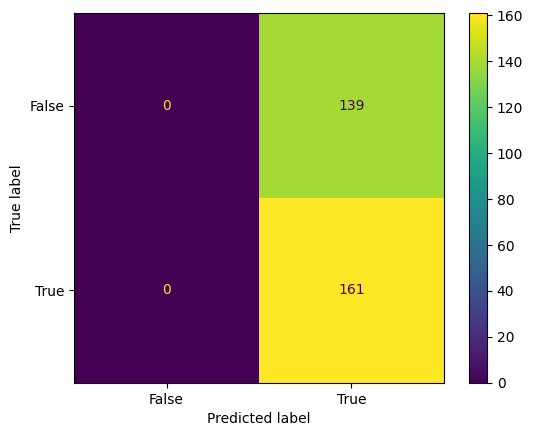

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       139
        True       0.54      1.00      0.70       161

    accuracy                           0.54       300
   macro avg       0.27      0.50      0.35       300
weighted avg       0.29      0.54      0.37       300



In [117]:
performance_check(svm_gridcv_best, X_test, y_test, classes)

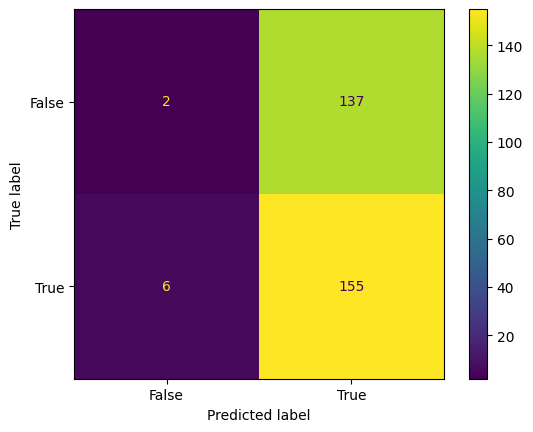

              precision    recall  f1-score   support

       False       0.25      0.01      0.03       139
        True       0.53      0.96      0.68       161

    accuracy                           0.52       300
   macro avg       0.39      0.49      0.36       300
weighted avg       0.40      0.52      0.38       300



In [118]:
performance_check(rf_gridcv_best, X_test, y_test, classes)

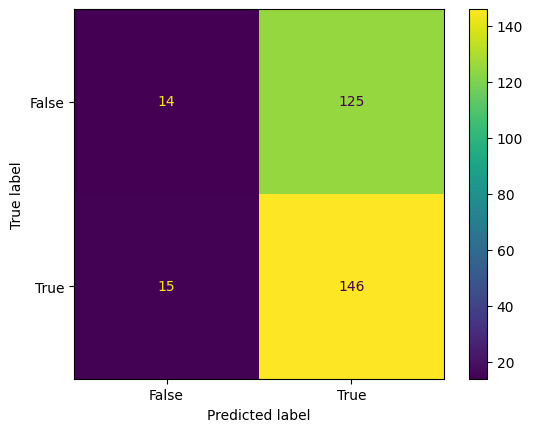

              precision    recall  f1-score   support

       False       0.48      0.10      0.17       139
        True       0.54      0.91      0.68       161

    accuracy                           0.53       300
   macro avg       0.51      0.50      0.42       300
weighted avg       0.51      0.53      0.44       300



In [119]:
performance_check(ada_gridcv_best, X_test, y_test, classes)

because the metric used is recall, so the model will predict more False Negative. on the other hand, the model is expected not to predict all data to be True so that over fitting does not occur.

It is known that:
- The SVM model has a True Positive value of 161 and a False Negative value of 139.
- The Random Forest model has a True Positive value of 158 and a False Negative value of 136.
- The Ada Boost model has a True Positive value of 146 and a False Negative value of 125

In other words:

- SVM model of 300 data, 161 data predicted true and actual true, 139 data predicted true and actual false.
- Random Forest model of 300 data, 158 data predicted true and actual true, 136 data predicted true and actual false
- Ada Boost model from 300 data, 146 data predicted true and actual true, 125 data predicted true and actual false.

From the three models, it is found that the false negative value is quite large, the assumption that occurs is that the threshold is too low, so after this, it is tried to increase the threshold value and then analyze it to find out the results.

## 11.2 Raise the Threshold

In [120]:
y_pred_new_proba = ada_gridcv_best.predict_proba(X_test)
y_pred_new_test = np.where(y_pred_new_proba[:,1] >= 0.5, 1, 0)
y_pred_new_test_51 = np.where(y_pred_new_proba[:,1] >= 0.520632303, 1, 0)

print(classification_report(y_test, y_pred_new_test))
print(classification_report(y_test, y_pred_new_test_51))
print('Recall    : ', recall_score(y_test, y_pred_new_test_51))

              precision    recall  f1-score   support

       False       0.48      0.10      0.17       139
        True       0.54      0.91      0.68       161

    accuracy                           0.53       300
   macro avg       0.51      0.50      0.42       300
weighted avg       0.51      0.53      0.44       300

              precision    recall  f1-score   support

       False       0.47      0.82      0.60       139
        True       0.58      0.22      0.32       161

    accuracy                           0.50       300
   macro avg       0.53      0.52      0.46       300
weighted avg       0.53      0.50      0.45       300

Recall    :  0.21739130434782608


In the code above, the threshold value is increased by 0.020632303 there are different values in recall and accuracy, so we will check the different values when the threshold is changed to further analyze the characteristics of the data entering True Negative and False Positive.

checking is focused on True Negative and False Positive values so that different data values will be checked again when the threshold is increased.

collecting True Negative and False Positive data before raising the threshold.

In [121]:
tn = y_test[(y_test==False)&(y_pred_new_test==False)]
itn = tn.index.sort_values().tolist()
fp = y_test[(y_test==True)&(y_pred_new_test==False)]
ifp = fp.index.sort_values().tolist()

collecting True Negative and False Positive data after raising the threshold

In [122]:
tn51 = y_test[(y_test==False)&(y_pred_new_test_51==False)]
itn51 = tn51.index.sort_values().tolist()
fp51 = y_test[(y_test==True)&(y_pred_new_test_51==False)]
ifp51 = fp51.index.sort_values().tolist()

checked for different index values

In [123]:
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]

In [124]:
returnNotMatches(itn,itn51)

[[],
 [40,
  42,
  58,
  63,
  73,
  90,
  91,
  99,
  112,
  125,
  144,
  158,
  161,
  166,
  185,
  193,
  210,
  211,
  224,
  238,
  242,
  247,
  249,
  267,
  274,
  288,
  296,
  300,
  303,
  304,
  310,
  314,
  316,
  327,
  338,
  343,
  352,
  364,
  368,
  374,
  406,
  435,
  444,
  450,
  455,
  467,
  486,
  488,
  489,
  502,
  517,
  531,
  544,
  546,
  548,
  556,
  578,
  601,
  615,
  622,
  628,
  633,
  634,
  651,
  659,
  664,
  677,
  698,
  713,
  719,
  752,
  762,
  766,
  767,
  770,
  789,
  811,
  816,
  827,
  832,
  834,
  835,
  840,
  844,
  847,
  849,
  863,
  885,
  896,
  905,
  915,
  919,
  920,
  923,
  931,
  942,
  962,
  969,
  984,
  993]]

In [125]:
returnNotMatches(ifp,ifp51)

[[],
 [3,
  20,
  41,
  56,
  60,
  67,
  77,
  84,
  92,
  94,
  100,
  103,
  139,
  151,
  159,
  169,
  175,
  222,
  239,
  251,
  254,
  257,
  258,
  262,
  270,
  277,
  290,
  299,
  311,
  315,
  321,
  325,
  341,
  350,
  358,
  380,
  385,
  388,
  421,
  423,
  432,
  446,
  448,
  458,
  469,
  474,
  479,
  493,
  501,
  514,
  518,
  522,
  524,
  537,
  542,
  549,
  563,
  564,
  566,
  570,
  579,
  583,
  585,
  604,
  605,
  607,
  614,
  623,
  639,
  649,
  669,
  687,
  689,
  690,
  700,
  703,
  708,
  710,
  711,
  720,
  747,
  751,
  756,
  774,
  776,
  793,
  825,
  826,
  829,
  846,
  848,
  857,
  861,
  867,
  870,
  875,
  881,
  883,
  907,
  909,
  914,
  916,
  918,
  932,
  946,
  967,
  968,
  970,
  985,
  988,
  996]]

displays the new True Negative data after raising the threshold

In [126]:
X_test.loc[[40, 42, 58, 63, 73, 90, 91, 99,112,125,144,158,161,166,185,193,210,211,224,238,242,247,249,267,274,288,296,300,303,304,310,314,316,327,
            338,343,352,364,368,374,406,435,444,450,455,467,486,488,489,502,517,531,544,546,548,556,578,601,615,622,628,633,634,651,659,664,677,698,
            713,719,752,762,766,767,770,789,811,816,827,832,834,835,840,844,847,849,863,885,896,905,915,919,920,923,931,942,962,969,984,993]]

,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,age_group
40,Female,192.95,2936.00,14,26,456.43,3,3,4,263,True,Unsubscribed,elderly
42,Female,28.02,8806.23,9,34,309.17,6,1,1,273,False,Responded,adult
58,Other,144.94,8398.45,3,44,101.25,8,2,3,21,False,Unsubscribed,teenager
63,Other,143.55,108.94,11,13,349.08,0,4,2,65,True,Responded,adult
73,Female,143.96,2348.58,14,49,443.26,0,1,5,42,False,Unsubscribed,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,Female,191.25,7317.25,15,37,127.52,2,1,2,39,False,Unsubscribed,adult
962,Female,89.76,9342.64,1,24,45.07,1,1,3,72,True,Responded,adult
969,Female,184.41,3740.69,1,42,312.11,5,1,5,168,False,Ignored,adult
984,Male,80.03,1557.75,10,49,440.93,4,1,1,184,True,Unsubscribed,elderly


there are 100 new True Negative data

displays the new False Positive data after raising the threshold

In [127]:
X_test.loc[[3, 20, 41, 56, 60, 67, 77, 84, 92, 94,100,103,139,151,159,169,175,222,239,251,254,257,258,262,270,277,290,299,311,315,321,325,341,350,358,380,385,388,
            421,423,432,446,448,458,469,474,479,493,501,514,518,522,524,537,542,549,563,564,566,570,579,583,585,604,605,607,614,623,639,649,669,687,689,690,700,703,
            708,710,711,720,747,751,756,774,776,793,825,826,829,846,848,857,861,867,870,875,881,883,907,909,914,916,918,932,946,967,968,970,985,988,996]]

,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,age_group
3,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,adult
20,Other,131.81,8984.59,5,72,298.90,1,1,2,323,True,Responded,elderly
41,Female,31.72,5065.76,17,31,92.50,9,0,1,202,True,Responded,adult
56,Other,146.57,6291.63,5,87,477.30,7,2,4,4,True,Responded,adult
60,Male,50.41,1505.67,8,66,72.76,7,3,4,86,True,Responded,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Female,78.18,9737.84,4,69,261.12,6,3,1,340,True,Unsubscribed,adult
970,Other,56.18,3002.55,10,35,484.70,9,4,5,249,True,Ignored,elderly
985,Other,123.02,4479.92,14,45,364.16,4,3,3,76,True,Unsubscribed,adult
988,Male,70.34,6316.38,5,48,202.66,5,4,1,92,True,Responded,adult


There are 111 new False Positive data

checked for each column

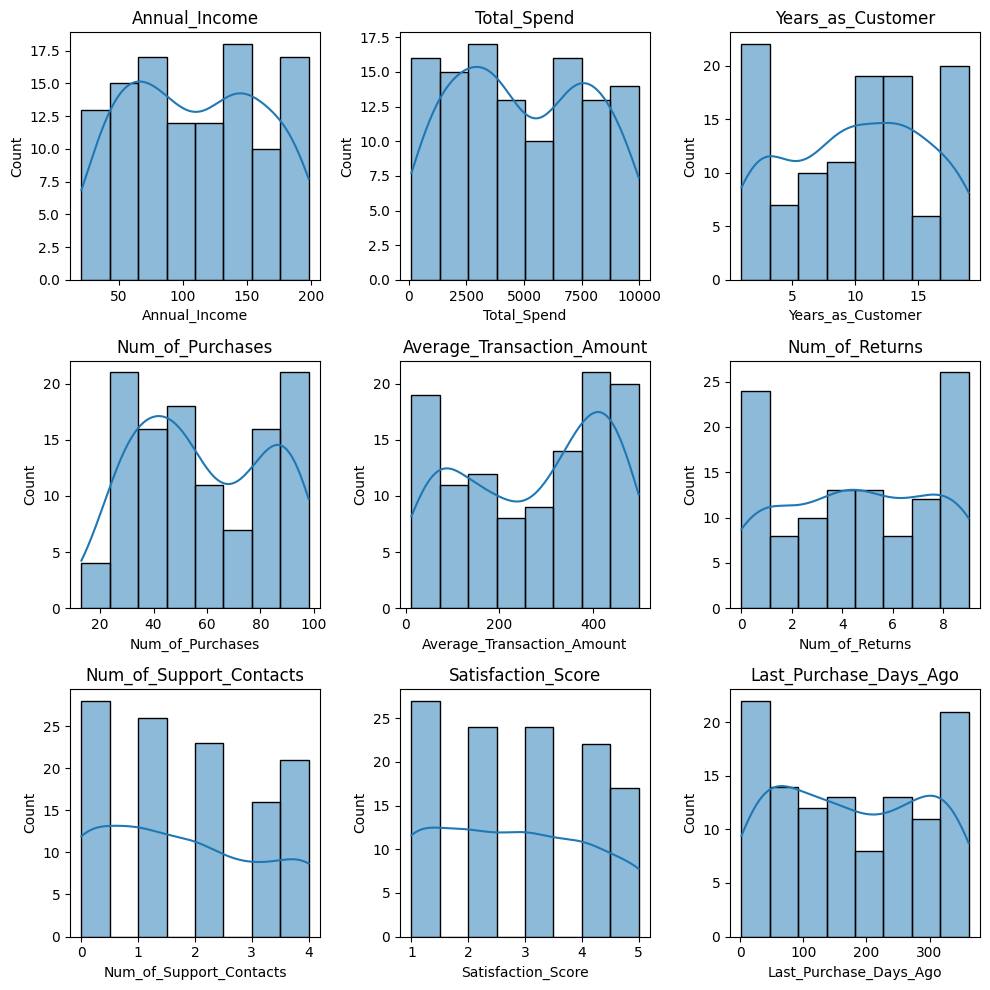

In [128]:
# Histogram fitur
fig = plt.figure(figsize=(10, 10))
num_rows = 3
num_cols = 3

data = ['Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts','Satisfaction_Score','Last_Purchase_Days_Ago']
for i, col in enumerate(data, 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    sns.histplot(data=X_test.loc[itn51], x=col, ax=ax, kde=True)
    ax.set_title(col)
plt.tight_layout()
plt.show()

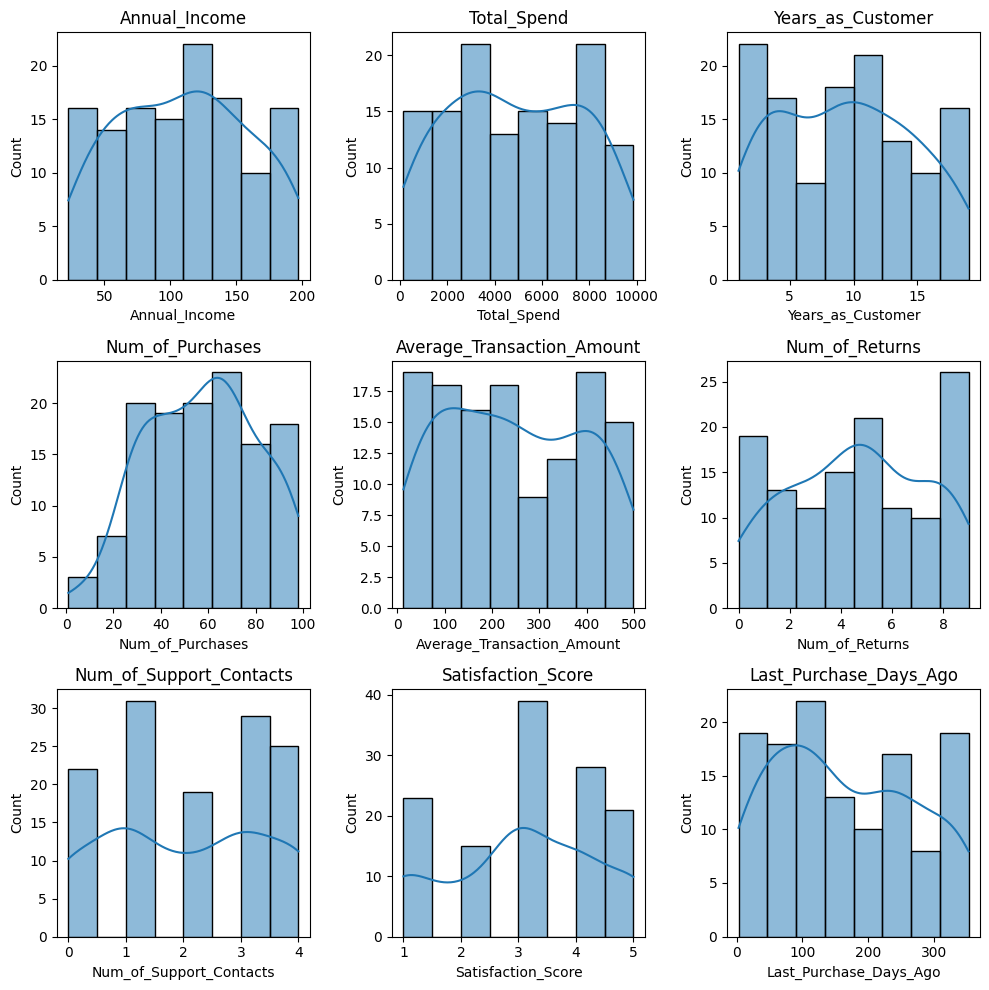

In [129]:
# Histogram fitur
fig = plt.figure(figsize=(10, 10))
num_rows = 3
num_cols = 3

data = ['Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns', 'Num_of_Support_Contacts','Satisfaction_Score','Last_Purchase_Days_Ago']
for i, col in enumerate(data, 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    sns.histplot(data=X_test.loc[ifp51], x=col, ax=ax, kde=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()

Data distribution of each feature in the True Negative and False Positive categories

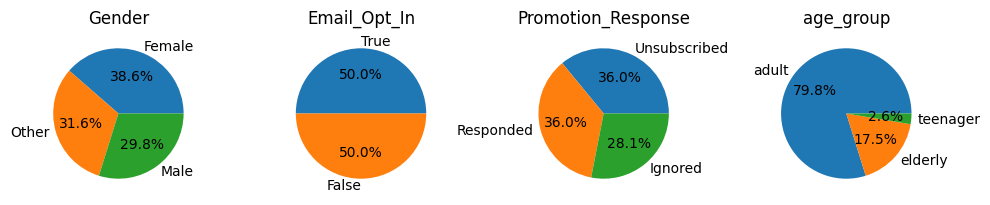

In [130]:
fig = plt.figure(figsize=(10, 10))
num_rows = 1
num_cols = 4

data = ['Gender','Email_Opt_In','Promotion_Response','age_group']
for i, col in enumerate(data, 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    values = X_test.loc[itn51, col].value_counts()
    ax.pie(x=values, labels=values.index, autopct='%1.1f%%')
    ax.set_title(col)
plt.tight_layout()
plt.show()


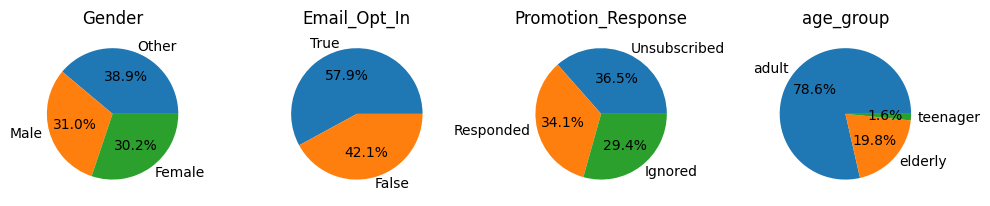

In [131]:
fig = plt.figure(figsize=(10, 10))
num_rows = 1
num_cols = 4

data = ['Gender','Email_Opt_In','Promotion_Response','age_group']
for i, col in enumerate(data, 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    values = X_test.loc[ifp51, col].value_counts()
    ax.pie(x=values, labels=values.index, autopct='%1.1f%%')
    ax.set_title(col)
plt.tight_layout()
plt.show()


Pie chart of each feature in the True Negative and False Positive categories

In [132]:
X_test.loc[[40, 42, 58, 63, 73, 90, 91, 99,112,125,144,158,161,166,185,193,210,211,224,238,242,247,249,267,274,288,296,300,303,304,310,314,316,327,
            338,343,352,364,368,374,406,435,444,450,455,467,486,488,489,502,517,531,544,546,548,556,578,601,615,622,628,633,634,651,659,664,677,698,
            713,719,752,762,766,767,770,789,811,816,827,832,834,835,840,844,847,849,863,885,896,905,915,919,920,923,931,942,962,969,984,993]].describe()

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,109.671500,5435.007100,10.220000,58.950000,265.745100,4.480000,1.740000,2.830000,177.620000
std,50.742715,2730.594924,5.432004,24.295893,154.301233,3.050021,1.382576,1.407448,111.235829
min,22.400000,108.940000,1.000000,13.000000,11.990000,0.000000,0.000000,1.000000,2.000000
25%,65.697500,3122.007500,5.750000,37.000000,100.612500,2.000000,1.000000,1.750000,77.250000
50%,111.610000,5604.725000,10.000000,55.500000,307.110000,4.000000,2.000000,3.000000,172.500000
75%,151.760000,7558.295000,14.000000,82.000000,408.365000,7.000000,3.000000,4.000000,273.500000
max,196.190000,9970.760000,19.000000,98.000000,493.480000,9.000000,4.000000,5.000000,357.000000


In [133]:
X_test.loc[[3, 20, 41, 56, 60, 67, 77, 84, 92, 94,100,103,139,151,159,169,175,222,239,251,254,257,258,262,270,277,290,299,311,315,321,325,341,350,358,380,385,388,
            421,423,432,446,448,458,469,474,479,493,501,514,518,522,524,537,542,549,563,564,566,570,579,583,585,604,605,607,614,623,639,649,669,687,689,690,700,703,
            708,710,711,720,747,751,756,774,776,793,825,826,829,846,848,857,861,867,870,875,881,883,907,909,914,916,918,932,946,967,968,970,985,988,996]].describe()

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,110.565586,5314.549910,9.126126,58.234234,231.970991,4.837838,2.018018,3.108108,162.747748
std,47.012024,2590.016761,5.226014,22.634228,142.880410,2.613046,1.439583,1.288772,107.176615
min,22.830000,510.220000,1.000000,7.000000,13.200000,0.000000,0.000000,1.000000,3.000000
25%,70.800000,3058.905000,5.000000,39.000000,103.845000,3.000000,1.000000,2.000000,72.000000
50%,112.610000,5215.710000,9.000000,60.000000,230.900000,5.000000,2.000000,3.000000,147.000000
75%,147.150000,7621.520000,13.000000,75.500000,354.120000,7.000000,3.000000,4.000000,251.500000
max,196.480000,9864.660000,19.000000,98.000000,493.850000,9.000000,4.000000,5.000000,353.000000


From the visualization and comparison of the new False Positive and True Negative data after the threshold is raised, it can be seen that the data has similar characteristics and is even still in the same range, illustrating that the False Positive and True Negative data are almost similar.

## 11.3 Final Analysis

From the results of the above analysis, after changing the threshold for characteristics in each customer row has a value that is more or less similar, so it can be concluded that the processed data has similar characteristics for those classified as true or false.

Therefore, it is found that the Ada Boost model is more flexible to data than other models, so this project uses **Ada Boost Tuning** for the best model.

# 12. Model Saving

The best model is the boost tuning that is in the pipeline.

In [134]:
ada_gridcv_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['Annual_Income',
                                                   'Total_Spend',
                                                   'Years_as_Customer',
                                                   'Num_of_Purchases',
                                                   'Average_Transaction_Amount',
                                                   'Num_of_Returns',
                                                   'Num_of_Support_Contacts',
                                                   'Last_Purchase_Days_Ago']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Email_Opt_In',
                                                   'age_group',
                                                   'Promotion_Response']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3',
                                                                                               '4',
                                                                                               '5']]))]),
                                                  ['Satisfaction_Score'])])),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=10))])

save the best model for use on other data

In [135]:
with open("best_model_ada_tuning.pkl", "wb") as file_1:
   pickle.dump(ada_gridcv_best, file_1)

# 13. Model Inference

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Customer_ID</th>
      <th>Age</th>
      <th>Gender</th>
      <th>Annual_Income</th>
      <th>Total_Spend</th>
      <th>Years_as_Customer</th>
      <th>Num_of_Purchases</th>
      <th>Average_Transaction_Amount</th>
      <th>Num_of_Returns</th>
      <th>Num_of_Support_Contacts</th>
      <th>Satisfaction_Score</th>
      <th>Last_Purchase_Days_Ago</th>
      <th>Email_Opt_In</th>
      <th>Promotion_Response</th>
      <th>age_group</th>
      <th>Churn</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>10001</td>
      <td>29</td>
      <td>Male</td>
      <td>54</td>
      <td>1200</td>
      <td>7</td>
      <td>9</td>
      <td>27</td>
      <td>6</td>
      <td>4</td>
      <td>3</td>
      <td>444</td>
      <td>False</td>
      <td>Ignored</td>
      <td>adult</td>
      <td>True</td>
    </tr>
  </tbody>
</table>
</div>

from the new data above, the model successfully classifies True or will Churn later.

# 14. Conclusion

From the series of work carried out, the results were obtained:

**Data**
- There are a total of 1000 customer data
- The data that is targeted is the Churn Target which will classify customers who will churn or not.
- The average Total Spend Customer is very small when compared to the Annual Income.
- The distribution in the numeric data is all normal
- there are 3 gender categories, 34% Female, 33% Male, and 32% Other
- The annual income range of customers is $179k
- Range of customer loyalty is 1 to 19 years
- 90% of customers have returned goods
- 32% of customers had to contact the Support Contact more than once before the problem was solved
- Only 18% of customers rated retail as excellent
- 47% of customers did not include their email
- On Promotion, only 34% of customers respond, even 36% of customers choose to unsubscribed 


**Build Model**
- Model building was attempted using 5 models namely, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, and Ada Boost.
- The model is evaluated using a recall metric to evaluate how well the model classifies customers who will churn and minimizes customers who actually churn but are not detected churn.
- The model will also be tested using cross validation to find out which model is best for classifying more general data.
- In the base model, the best model is Support Vector Machine judged by cross validation, after tuning, there are 3 best models judged by cross validation, namely: SVM with a value of 1, Random Forest with a value of 0.92, and Ada Boost with a value of 0.90.
- The three best models were re-analyzed by increasing the threshold and it was found that the Ada Boost model was more flexible to the data so in this project using the **Ada Boost Tuning** model.
- The built model was tried to classify 1 new data, and succeeded to classify the data where the result is True or will churn.
- Although it can classify new data, the model has a drawback that it will tend to classify data as True even though it is wrong, this is assumed because the characteristics of each classification tend to be similar.
- The model can also be tested [here](https://huggingface.co/spaces/putrayasira/milestone2)

**Future Improvement**
- Can use other algorithms that make it possible to get better recall values and better accuracy as well.

**Conclusion**
- In this project with the Ada Boost model that has been tuned, it becomes the best model and successfully classifies customers whether to churn or not with a recall metric in order to reduce the results of customers who should churn detected not churn with a recall value of 90%.

---

**Business Insight**
- The high return rate of goods reaching 90% means that retail really needs improvement in the Quality Control of goods before they are given to customers.
- 32% of problems cannot be resolved in 1 time assistance by customer support, there must be an improvement in terms of problem solving by the customer support team, if needed, retraining or additional training for the customer support team can be carried out so that they can solve customer problems more efficiently
- only 18% of customers give 5 stars to retail, retailers are advised to make surveys to customers in order to improve services and be able to evaluate the mistakes that occur
- The promotions provided should benefit, here 36% of customers prefer to unsubsribed or unsubscribe, the marketing team is required to be able to evaluate the promotions carried out, it is possible that customers feel annoyed instead of interested in the promotions provided by the retail marketing team.
- It is also expected that retail can store more customer email data so that it can provide promotions to customers more broadly.

---